In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## To run in Colab

In [ ]:
# !pip install fastai==1.0.59
# !pip install -q torch==1.4.0 torchvision==0.5.0

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)
# !ls "/content/gdrive/My Drive/CVbyDL/data/minicity"

In [2]:
from fastai import *
from fastai.vision import *
import os
from glob import glob
from utils.databunch import *
from utils.metrics import acc_cityscapes, mIOU
from models.UNet.unet import UNet
from utils.evaluate import save_to_eval

In [3]:
# base_dir = "/content/gdrive/My Drive/CVbyDL/data/minicity"
# test_dir = "/content/gdrive/My Drive/CVbyDL/data/cityspaces"
base_dir = "data/minicity"
test_dir = "data/cityspaces"

In [4]:
data = get_databunch(base_dir, size =(512,1024) , bs=2)

In [5]:
metrics= [acc_cityscapes, mIOU]


## Prepare UNet model

In [6]:
learn = unet_learner(data,models.resnet34, metrics=metrics,pretrained=False)

In [7]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
lr_find(learn)
learn.recorder.plot()

In [8]:
lr = 1e-4
learn.fit_one_cycle(100, slice(lr), pct_start=0.9)

epoch,train_loss,valid_loss,acc_cityscapes,mIOU,time
0,3.235313,2.772645,0.423373,0.031540,02:06
1,2.339129,2.130733,0.551202,0.060416,01:59
2,1.926537,1.885914,0.587819,0.070891,01:59
3,1.723594,1.785665,0.602780,0.074165,01:59
4,1.617083,1.713979,0.618498,0.079354,01:59
5,1.534653,1.636008,0.616391,0.102211,01:59
6,1.516172,1.563240,0.645775,0.095631,01:58
7,1.442150,1.507082,0.663713,0.101000,01:58
8,1.410883,1.458255,0.663565,0.115924,01:58
9,1.372757,1.462135,0.668437,0.128439,01:59


In [9]:
learn.save('dynamic_unet')

## test on competition dataset

In [11]:
learn.load('dynamic_unet')

Learner(data=ImageDataBunch;

Train: LabelList (200 items)
x: SegmentationItemList
Image (3, 512, 1024),Image (3, 512, 1024),Image (3, 512, 1024),Image (3, 512, 1024),Image (3, 512, 1024)
y: SegmentationLabelList
ImageSegment (1, 512, 1024),ImageSegment (1, 512, 1024),ImageSegment (1, 512, 1024),ImageSegment (1, 512, 1024),ImageSegment (1, 512, 1024)
Path: data/minicity/leftImg8bit;

Valid: LabelList (100 items)
x: SegmentationItemList
Image (3, 512, 1024),Image (3, 512, 1024),Image (3, 512, 1024),Image (3, 512, 1024),Image (3, 512, 1024)
y: SegmentationLabelList
ImageSegment (1, 512, 1024),ImageSegment (1, 512, 1024),ImageSegment (1, 512, 1024),ImageSegment (1, 512, 1024),ImageSegment (1, 512, 1024)
Path: data/minicity/leftImg8bit;

Test: None, model=DynamicUnet(
  (layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
 

In [12]:
test_dataset = get_databunch(test_dir, size = (512,1024), bs =2)

In [13]:
learn.validate(test_dataset.valid_dl)

[0.822937, tensor(0.8330), tensor(0.2316)]

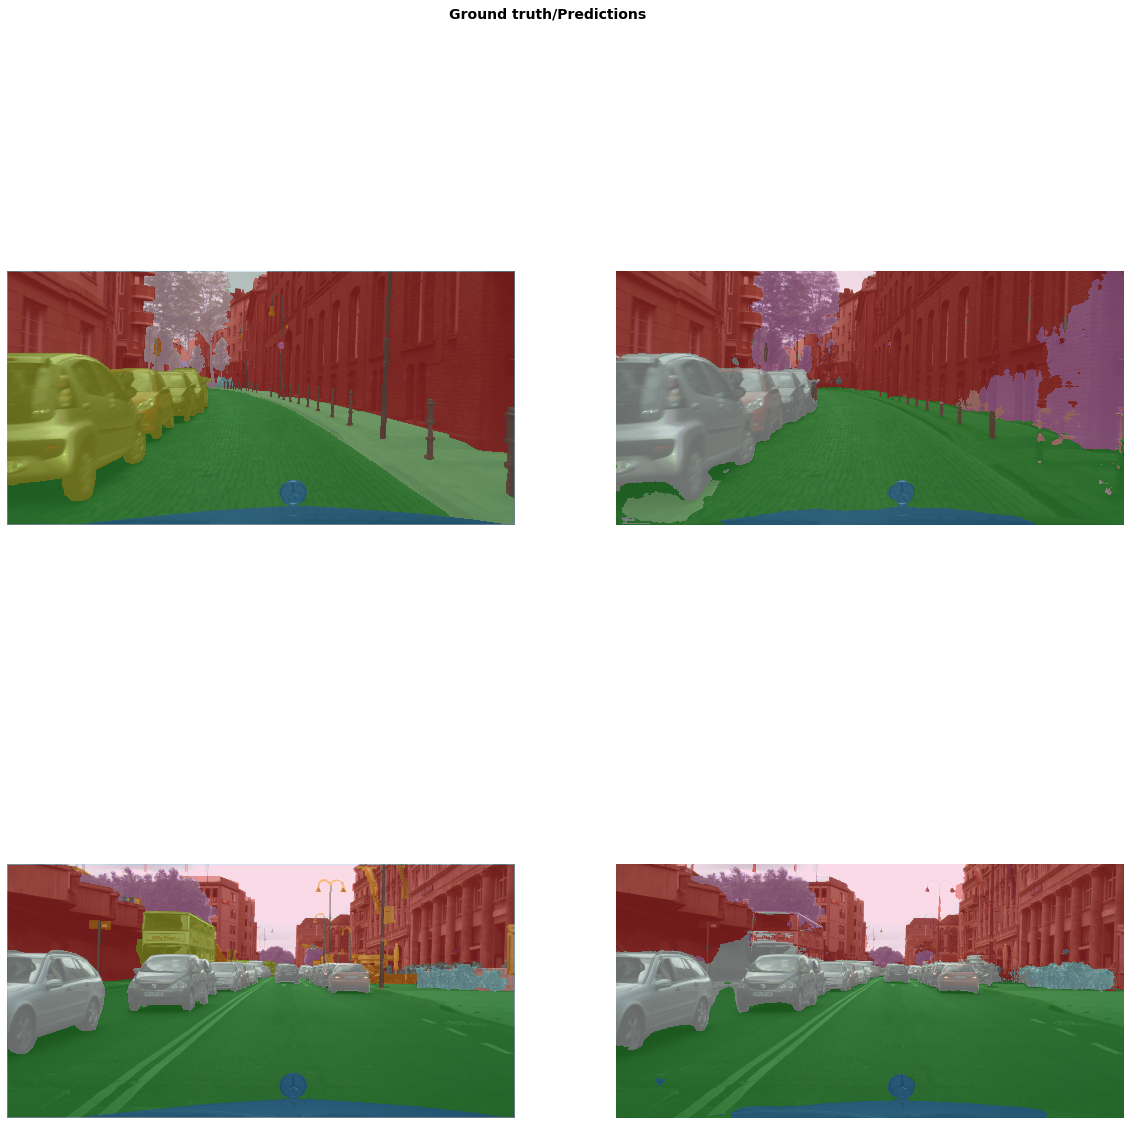

In [19]:
learn.show_results(rows=3, figsize=(20,20))

## Preadict and save

In [14]:
save_to_eval(learn, test_dataset)    


In [15]:
!python toolkit/semantic-segmentation/evaluate.py --results results/ --minicity data/cityspaces/

Evaluating 500 pairs of images...
Images Processed: 500 

-------------- ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------- 
              |  u   |  e   |  r   |  o   |  s   |  d   |  g   |  r   |  s   |  p   |  r   |  b   |  w   |  f   |  g   |  b   |  t   |  p   |  p   |  t   |  t   |  v   |  t   |  s   |  p   |  r   |  c   |  t   |  b   |  c   |  t   |  t   |  m   |  b   | Prior |
-------------- ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------- 
    unlabeled | [31;1 0.00   [31;1 0.00   [31;1 0.00   [31;1 0.00   [31;1 0.00   [31;1 0.00   [31;1 0.00   [31;1 0.00   [31;1 0.00   [31;1 0.0

FlattenedLoss of CrossEntropyLoss()